In [76]:
import pandas as pd
import pandas_flavor as pf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
from janitor import remove_columns, rename_column, remove_empty, filter_on, groupby_agg


In [104]:
gdp_df = pd.read_csv("../data/UNdata_Export_20230915_015125007.csv")


cleaned_gdp_df = (
    pd.read_csv("../data/UNdata_Export_20230915_015125007.csv")
    .clean_names()
    .remove_columns("value_footnotes")
    .rename(columns={"country_or_area": "Country", "year": "Year", "value": "GDP_Per_Capita"})
    # .remove_empty()
)


In [126]:
gdp_df_2014 = (cleaned_gdp_df.filter_on('Year == 2014'))

top_and_bottom_five = pd.concat([gdp_df_2014.nlargest(5, 'GDP_Per_Capita'), gdp_df_2014.nsmallest(5, 'GDP_Per_Capita')])
top_and_bottom_five

,Country,Year,GDP_Per_Capita
3919,"Macao SAR, China",2014,155201.740571
3888,Luxembourg,2014,113313.578898
5387,Qatar,2014,95578.261511
5726,Singapore,2014,87616.637527
645,Bermuda,2014,77361.104881
1142,Central African Republic,2014,822.611195
920,Burundi,2014,886.235296
5877,Somalia,2014,917.876549
1530,Dem. Rep. Congo,2014,1029.790813
4756,Niger,2014,1126.805440


(array([90., 59., 21., 20., 13., 12., 11.,  8.,  3.,  1.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.61119489,   8541.56766369,  16260.52413249,  23979.48060129,
         31698.43707008,  39417.39353888,  47136.35000768,  54855.30647648,
         62574.26294527,  70293.21941407,  78012.17588287,  85731.13235167,
         93450.08882046, 101169.04528926, 108888.00175806, 116606.95822686,
        124325.91469565, 132044.87116445, 139763.82763325, 147482.78410205,
        155201.74057084]),
 <BarContainer object of 20 artists>)

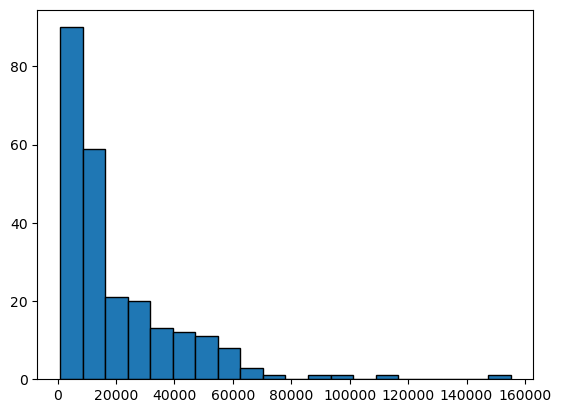

In [123]:
plt.hist(gdp_df_2014['GDP_Per_Capita'], bins=20, edgecolor='k')

In [127]:

gdp_df_1990_2018_pivot = cleaned_gdp_df[cleaned_gdp_df['Year'].isin([1990, 2018])].pivot(index='Country', columns='Year', values="GDP_Per_Capita").dropna(subset=[1990, 2018])

gdp_df_1990_2018_pivot["Percent Change"] = 100 * (gdp_df_1990_2018_pivot[2018] - gdp_df_1990_2018_pivot[1990]) / gdp_df_1990_2018_pivot[1990]
gdp_df_1990_2018_pivot


Year,1990,2018,Percent Change
Country,,,
Africa Eastern and Southern,3083.976800,3697.317275,19.887973
Africa Western and Central,2810.341129,4132.592996,47.049515
Albania,4827.034551,13317.092313,175.885581
Algeria,8746.340762,11630.679409,32.977661
Angola,5758.950488,6982.129420,21.239615
...,...,...,...
Vanuatu,2855.554643,3093.086718,8.318247
Vietnam,2066.372215,9548.700016,362.099710
World,9704.621768,16679.316815,71.869829


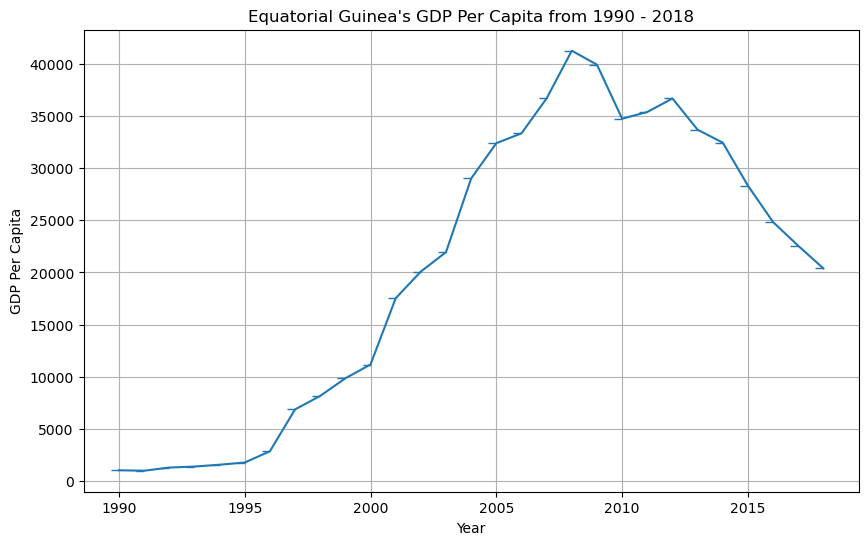

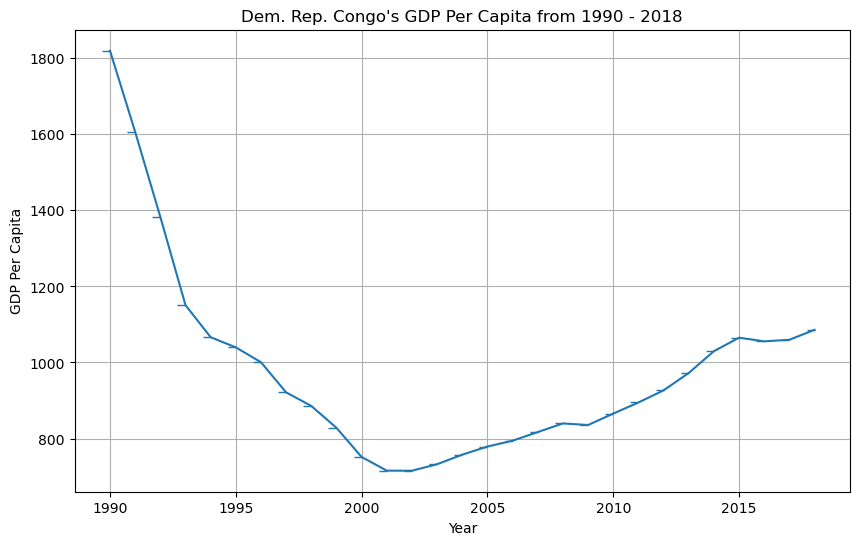

In [131]:

negative_growth_countries = gdp_df_1990_2018_pivot[gdp_df_1990_2018_pivot['Percent Change'] < 0]
negative_growth_countries

highest_growth_country = gdp_df_1990_2018_pivot['Percent Change'].idxmax()
highest_growth_country

highest_growth_value = gdp_df_1990_2018_pivot.loc[highest_growth_country, 'Percent Change']
highest_growth_value

lowest_growth_country = gdp_df_1990_2018_pivot['Percent Change'].idxmin()

country_data_highest_growth_data = cleaned_gdp_df[(cleaned_gdp_df['Country'] == highest_growth_country) & (cleaned_gdp_df['Year'].between(1990, 2018))]
country_data_lowest_growth_data = cleaned_gdp_df[(cleaned_gdp_df['Country'] == lowest_growth_country) & (cleaned_gdp_df['Year'].between(1990, 2018))]

plt.figure(figsize=(10,6))
country_data_highest_growth_data.set_index('Year')['GDP_Per_Capita'].plot(linestyle='-', marker=0)
plt.title(f"{highest_growth_country}'s GDP Per Capita from 1990 - 2018")
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
country_data_lowest_growth_data.set_index('Year')['GDP_Per_Capita'].plot(linestyle='-', marker=0)
plt.title(f"{lowest_growth_country}'s GDP Per Capita from 1990 - 2018")
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [135]:
continents = pd.read_csv("../data/continents.csv")

gdp_df = pd.merge(cleaned_gdp_df, continents, on='Country', how='inner')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2020,1970.560169,Asia
1,Afghanistan,2019,2065.036235,Asia
2,Afghanistan,2018,2033.804389,Asia
3,Afghanistan,2017,2058.400221,Asia
4,Afghanistan,2016,2057.067978,Asia
...,...,...,...,...
5577,Zimbabwe,1994,2603.927369,Africa
5578,Zimbabwe,1993,2420.092791,Africa
5579,Zimbabwe,1992,2437.152908,Africa
5580,Zimbabwe,1991,2733.696626,Africa


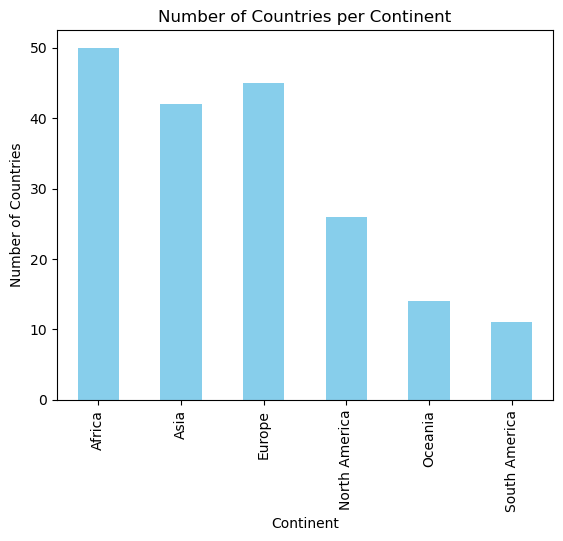

In [163]:
countries_per_continent = (
    gdp_df.groupby_agg(by='Continent', agg='nunique', agg_column_name='Country', new_column_name='num_countries' )
)

countries_per_continent = countries_per_continent.groupby('Continent')['Country'].nunique()
countries_per_continent.plot(kind='bar', color='skyblue')
plt.title('Number of Countries per Continent')
plt.ylabel('Number of Countries')
plt.xlabel('Continent')
plt.xticks(color='black')
plt.show()

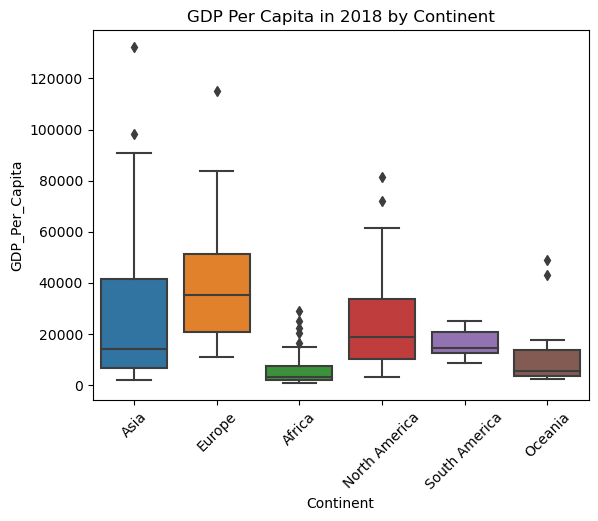

In [165]:
gdp_df_2018 = (gdp_df.filter_on('Year == 2018'))

sns.boxplot(x='Continent', y='GDP_Per_Capita', data=gdp_df_2018)
plt.title('GDP Per Capita in 2018 by Continent')
plt.xticks(rotation=45)
plt.show()



In [211]:
life_expectancy = (
    pd.read_csv('../data/life_expectancy.csv', skiprows=4)
    .remove_columns('Country Code')
    .remove_columns('Indicator Code')
    .remove_columns('Indicator Name')
    .rename(columns={"Country Name": "Country"})
)
life_expectancy.columns

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', 'Unnamed: 67'],
      dtype='object')

In [223]:
id_vars = ['Country']

value_vars = [str(i) for i in range(1960, 2022) if str(i) in life_expectancy.columns]

life_expectancy = life_expectancy.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Life Expectancy')
life_expectancy

,Country,Year,Life Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16487,Kosovo,2021,76.806000
16488,"Yemen, Rep.",2021,63.753000
16489,South Africa,2021,62.341000
16490,Zambia,2021,61.223000


In [224]:
threshold_age = 80

filtered_80_life_expectancy_df = life_expectancy[life_expectancy['Life Expectancy'] > threshold_age]

first_country = (
    filtered_80_life_expectancy_df.sort_values(by=['Year', 'Life Expectancy'], ascending=[True, True])
    .groupby('Year')
    .first()
    .reset_index()
)
first_country.head(10)

,Year,Country,Life Expectancy
0,1996,Japan,80.219756
1,1997,"Hong Kong SAR, China",80.126829
2,1998,"Hong Kong SAR, China",80.131707
3,1999,"Hong Kong SAR, China",80.382927
4,2000,"Hong Kong SAR, China",80.878049
5,2001,Italy,80.126829
6,2002,Italy,80.229268
7,2003,Sweden,80.095122
8,2004,Channel Islands,80.125000
9,2005,Norway,80.041463


In [246]:
gdp_df['Year'].astype('int64')
life_expectancy['Year'] = life_expectancy['Year'].astype('int64')

print(f'{gdp_df.dtypes} \n {life_expectancy.dtypes}')

gdp_le = pd.merge(gdp_df, life_expectancy, on=['Year', 'Country'], how='inner')
gdp_le.tail(5)

Country            object
Year                int64
GDP_Per_Capita    float64
Continent          object
dtype: object 
 Country             object
Year                 int64
Life Expectancy    float64
dtype: object


,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
5236,Zimbabwe,1994,2603.927369,Africa,52.588
5237,Zimbabwe,1993,2420.092791,Africa,54.426
5238,Zimbabwe,1992,2437.152908,Africa,56.435
5239,Zimbabwe,1991,2733.696626,Africa,58.091
5240,Zimbabwe,1990,2652.129209,Africa,59.426


In [266]:
countires_life_expectancy_atleast_80_2019 = (
    gdp_le.filter_on('Year == 2019')
    .filter_on('`Life Expectancy` > 80')
    .shape[0]
)
countires_life_expectancy_atleast_80_2019

34

In [267]:

top_3_by_GDP_2019 = (
    gdp_le.filter_on('Year == 2019')
    .sort_values(by='GDP_Per_Capita', ascending=False)
    .head(3)
)
top_3_by_GDP_2019


,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2715,"Macao SAR, China",2019,127272.548511,Asia,84.978000
2684,Luxembourg,2019,116518.276815,Europe,82.639024
4140,Singapore,2019,98283.308908,Asia,83.595122


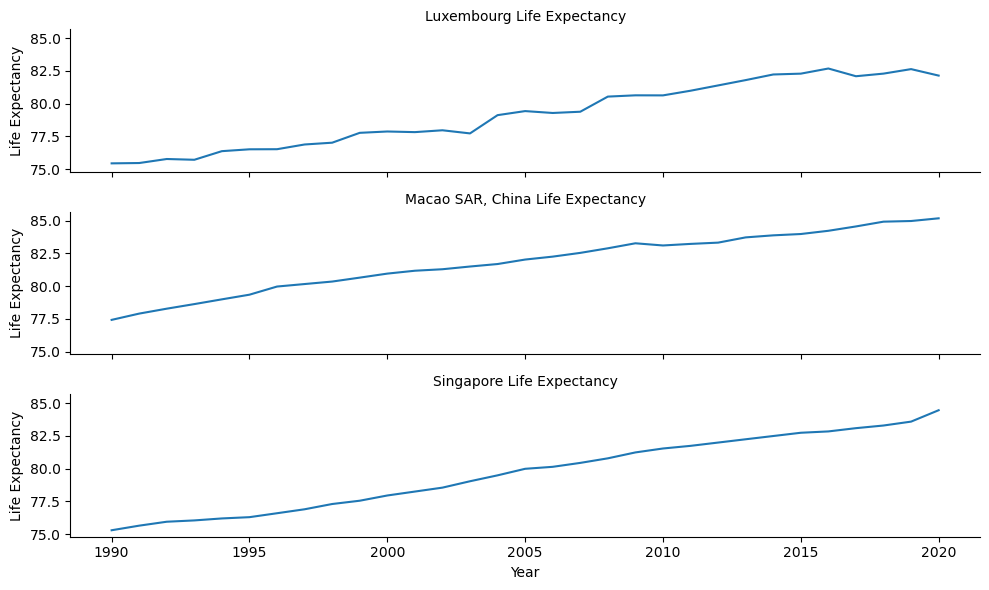

In [269]:

countries = top_3_by_GDP_2019['Country']
top_3_by_GDP = gdp_le[gdp_le['Country'].isin(countries)]
top_3_by_GDP

g = sns.FacetGrid(top_3_by_GDP, row='Country', height=2, aspect=5)
g.map(sns.lineplot, 'Year', 'Life Expectancy')

g.set_axis_labels('Year', 'Life Expectancy')
g.set_titles('{row_name} Life Expectancy')
g.tight_layout

plt.show()


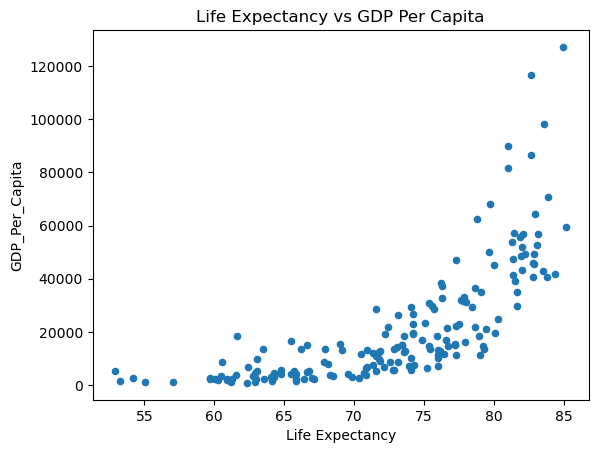

In [272]:
gdp_le_2019 = gdp_le.filter_on('Year == 2019')
gdp_le_2019

gdp_le_2019.plot(kind='scatter', x='Life Expectancy', y='GDP_Per_Capita')
plt.title('Life Expectancy vs GDP Per Capita')
plt.show()